In [1]:
# L3, S18

""" Linear Regression

  - Fit straight line (slope + y-intercept) to data (y = mx + b)
  - Usually least squares error (so you can covariance/correlation)
  - Slope is the correlation between the two variables times the std_dev
    in Y, divided by std_dev in X
  - Y-intercept is the mean of y minus the slope times the mean of x
    - b = mean(y) - m*mean(x)
  - Same as maximizing likelihood of observed data 
    (i.e. y = mx + b is the most likely observation)
    - a.k.a. MLE: Maximum Likelihood Estimation
    """

' Linear Regression\n\n  - Fit straight line (slope + y-intercept) to data (y = mx + b)\n  - Usually least squares error (so you can covariance/correlation)\n  - Slope is the correlation between the two variables times the std_dev\n    in Y, divided by std_dev in X\n  - Y-intercept is the mean of y minus the slope times the mean of x\n    - b = mean(y) - m*mean(x)\n  - Same as maximizing likelihood of observed data \n    (i.e. y = mx + b is the most likely observation)\n    - a.k.a. MLE: Maximum Likelihood Estimation\n    '

In [2]:
# Measure error with r-squared : 
# 1.0 - sum of squared errors / sum of squared variation from mean

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


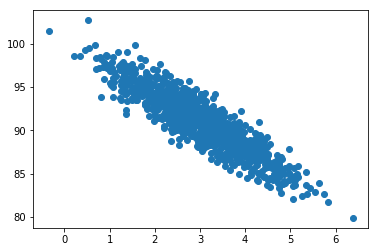

In [10]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0,0.5,1000)) * 3

plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

In [11]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [12]:
r_value**2

0.80812324836323624

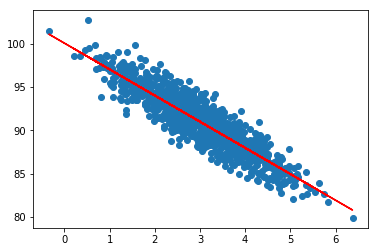

In [13]:
def predict(x):
    return slope * x + intercept

fitline = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitline, c='r')
plt.show()

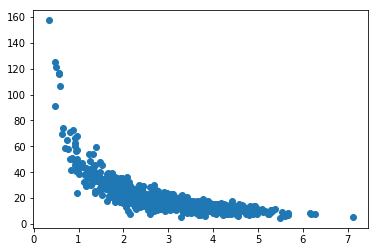

In [14]:
# L3, S19
# Polynomial Regression

# 
np.random.seed(2)

pageSpeeds = np.random.normal(3, 1, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

In [38]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x,y,8))

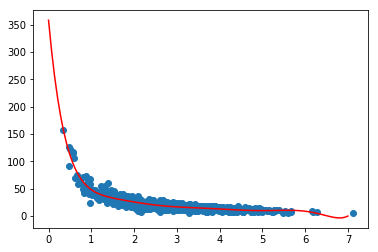

In [39]:
xp = np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot(xp,p4(xp), c='r')
plt.show()

In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print(r2)

0.881439566368


In [41]:
# L3, S20
# Multivariate Regression

# Still use least squares
# Ex. price = b + x_1 * mileage + b_2 * age + b_3 * doors
# *** Maybe remove variables with low coefficients since they aren't useful

# Need to assume factor's aren't dependent on each other

In [50]:
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [52]:
import statsmodels.api as sm

df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors', 'Liter']]
y = df.Price

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()
# Look at std_err to see what's important in un-normalized data
# Otherwise use coefficient

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     130.5
Date:                Wed, 08 Feb 2017   Prob (F-statistic):           9.16e-86
Time:                        10:54:01   Log-Likelihood:                -8334.0
No. Observations:                 804   AIC:                         1.668e+04
Df Residuals:                     799   BIC:                         1.670e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.569e+04   1608.539      9.756      0.000      1.25e+04  1.88e+04
Mileage       -0.1684      0.033     -5.073      0.000        -0.234    -0.103
Model_ord   -288.0446     33.316     -8.646      0.000      -353.441  -222.648
Doors      -1134.8902    320.958     -3.536      0.000     -1764.912  -504.869
Liter       5685.3090    263.052     21.613      0.000      5168.955  6201.663
==============================================================================
Omnibus:                      293.254   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1072.654
Skew:                           1.727   Prob(JB):                    1.19e-233
Kurtosis:                       7.483   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [54]:
# L3, S21
# Multi-Level Models

""" 
- Some effects happen at various levels (hierarchical)
    - wealth depends on your work, your parents did, what their parents
        did, etc.
"""

' \n- Some effects happen at various levels (hierarchical)\n    - wealth depends on your work, your parents did, what their parents\n        did, etc.\n'